в датасете данные о машинах в ЮК. буду работать только с БМВ

что такое человеческого обучение. 
Это процесс создания алгоритма вручную, основываясь на анализе данных буду смотреть на данные и разрабатывать правила и алгоритм, который предскажет цену
Это алгоритм определения цены по параметрам автомобиля
В данных есть какие то данные и цена. 
буду смотреть на данные в колокнках 
'model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'
что бы построить алгоритм определяющий цену автомобиля
тоесть я смотрю примеры которые есть и смотрю на какие то правила по которым буду определять цену автомобиля
Цель: Построить алгоритм, который будет определять цену автомобиля на основе различных характеристик: модель, год выпуска, цена, трансмиссия, пробег, тип топлива, налог, расход топлива (mpg) и размер двигателя.

1. [training and test set](#training-and-test-set)
2. [data analize](#data-analize)
3. [baseline](#base-line)
4. [algoritm based of the year](#algoritm-based-of-the-year)
5. [median year](#median-year)
6. [add new variable](#add-new-variable)
7. [upgrade model](#upgrade-model)

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('uk-used-cars/bmw.csv')
df.keys(), df.columns


(Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
        'mpg', 'engineSize'],
       dtype='object'),
 Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
        'mpg', 'engineSize'],
       dtype='object'))

# training and test set

разбиваю данные на две части. Обучающую и тестовую выборку
потому что когда создаю алговритм. надо будет потом его проверить. Норм он работает или нет. смотреть то на сколько алгоритм хорош надо на тестовой выборке(20-30 процентов)

sklearn будем использовать для обучения и для разбивки данных

In [3]:
from sklearn.model_selection import train_test_split

появилось 2 куса. один большой, другой поменьше(train and test). можно передать параметр 

, train_size=0.7 если надо изменмит размер данных для обучения

train test всегда рандомные если что. и эксперимент всегда будет разный.
но можно этого избежать и рандом можно зафиксить. заморозить. с помощью random_state=42(или любую друго число)

In [4]:

train, test = train_test_split(df, random_state=42)

In [5]:
# тренировочные, тестовые,все вместе, изначальный датафрейм, сколько процентов ушло на тест данные
len(train), len(test), len(train) + len(test), len(df), len(test) / len(df)

(8085, 2696, 10781, 10781, 0.2500695668305352)

In [6]:
train # анализировать и работать будем с трайн. там будем искать взаимосвязи

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


# data analize

In [7]:
train.isna().mean() # посмотреть пропуски. возможно их надо будет заполнить

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [8]:
df.isna().mean() # посмотреть пропуски. возможно их надо будет заполнить

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [9]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


вот мое предположение. что чем новее машина, тем она дороже. как понять взаимосвязь между годом и ценой??

с помощью сводной таблицы

<Axes: >

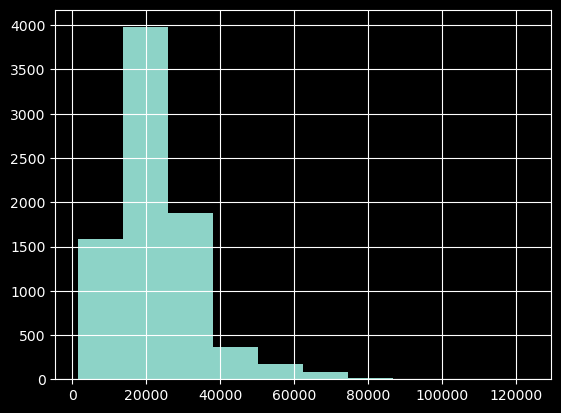

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')


# анализ цены
train['price'].hist() # цена идет от 0 до 120 тысяч. большинсство машин сосредоточено в цене 20 тысяч

In [11]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [11]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [13]:
# сверяюсь с графиком

<Axes: xlabel='year'>

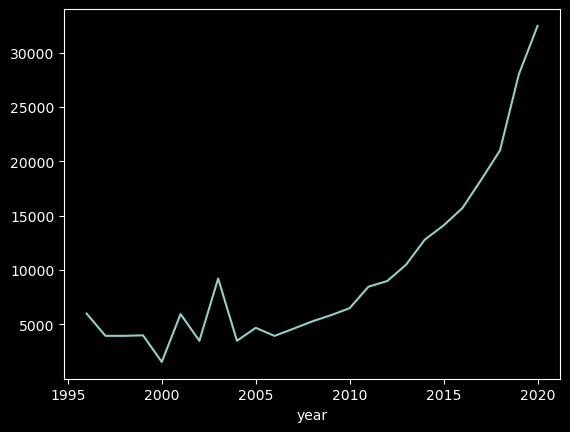

In [12]:
train.groupby('year')['price'].median().plot()

 # base line

найти ту точку от которой буду отталкиваться. если я не могу сделать лучше чем  baseline то  смысла работы особо нет.

Baseline — это начальная модель или простое решение, с которым сравниваются более сложные модели. Это как отправная точка, чтобы понять, насколько хороша твоя модель. Например, baseline может быть средней ценой для всех автомобилей. Если твой алгоритм не может предсказать цену лучше, чем этот baseline, то смысла в усложнении работы нет, так как более сложная модель должна показывать лучшую производительность, чем простейший подход.


In [13]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [14]:
train['price_pred_mean'] = train['price'].mean()

просто всем записал среднее. теперь надо найти способ оценить ошибку

In [15]:
train


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645
...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645


In [16]:
train['err'] = train['price_pred_mean'] - train['price'] # видно на сколько промахнулся

In [17]:
import numpy as np
# что будет если у нас есть значение -2 и 2. среднее будет 0. но это же по факту не  так
np.mean([-2, 2]) # короче просто среднее из столбца err вывести не вариант

0.0

In [18]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645
...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645


In [19]:
# поэтому надо будет отбросить знак
train['err_abs'] = abs(train['err'])
train 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645


In [20]:
train['err_abs'].mean() # вот теперь, когда значения без знака, можно посчитать среднне, того как ошибаюсь

8450.556631461715

In [21]:
train['err_abs_pct'] = train['err_abs'] / train['price']
train['err_abs_pct'].mean() # видно что 43 процента ошибка. Херовый способ определения цены

0.48316912602731443

НО это  был baseline

In [22]:
train['price_pred_median'] = train['price'].median() # попробую с медианой

теперь ошибку и процент ошибки посчитаю с помощью встроенной функции у sklearn

In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [24]:
# функция для подсчета ошибки(как сильно ошибается модель)
# y_true=правильный ответ из данных   y_pred=то что мы предсказали
mean_absolute_error(y_true=train['price'], y_pred=train['price_pred_mean'])

8450.556631461715

In [25]:
mean_absolute_percentage_error(y_true=train['price'], y_pred=train['price_pred_mean'])

0.48316912602731443

In [26]:
mean_absolute_error(y_true=train['price'], y_pred=train['price_pred_median'])

8220.5146567718

In [27]:
mean_absolute_percentage_error(y_true=train['price'], y_pred=train['price_pred_median'])

0.41711111879393314

 короче медиана  тоже не то. но дает лучшее качество. и берем ее за baseline
 
 и теперь попробую на тестовых данных. я беру тестовые данные и записываю медиану туда не из тестовых данных а из
 тренеровочных. так как моя задача ее определять

In [28]:
 
test['price_pred_median'] = train['price'].median() 

In [29]:
test #

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0
...,...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0


теперь проверю ошибку на тестовых данных

In [30]:
mean_absolute_error(y_true=test['price'], y_pred=test['price_pred_median'])

8211.845697329376

In [31]:
mean_absolute_percentage_error(y_true=test['price'], y_pred=test['price_pred_median'])

0.409212791738344

# algoritm based of the year

теперь попробую предсказать цену машины на основе года. возму медиану по годам
буду брать медиану, так как она сработала на бейзлайне лучше чем среднее



In [32]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [33]:
# но можно проверить и среднее. вдруг оно будет здесь лучше работать чем медиана
# можно посомтреть что лучше и сравнить
# reset_index превращает в дата фрейм
model_year_mean = train.groupby('year')['price'].mean().reset_index()


In [34]:
model_year_mean.columns

Index(['year', 'price'], dtype='object')

In [35]:
model_year_mean.columns = ['year', 'price_pred_year_mean']

In [36]:
model_year_mean.columns

Index(['year', 'price_pred_year_mean'], dtype='object')

In [37]:
# left join чтто бы ничего не пропало, вдруг каких то годов нет в train
train = train.merge(model_year_mean, how='left', on='year') 
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222


### теперь считаем ошибку


In [38]:
mean_absolute_error(y_true=train['price'], y_pred=train['price_pred_year_mean'])

5474.243598515644

In [39]:
mean_absolute_percentage_error(y_true=train['price'], y_pred=train['price_pred_year_mean'])

0.2447228468704618

теперь результаты получше. ранее когда на baseline была медиана, было 

8220.5146567718

0.41711111879393314

это результаты на train данных


In [40]:
# почему к тестовым данным кладу train данные
test = test.merge(model_year_mean, how='left', on='year') 


In [41]:
mean_absolute_error(y_true=test['price'], y_pred=test['price_pred_year_mean'])

5426.271071211102

In [42]:
mean_absolute_percentage_error(y_true=test['price'], y_pred=test['price_pred_year_mean'])

0.23933940428873632

# median year

теперь посчитаю вместо среднего по году медиану. что бы посмотреть что лучше предсказывает цену. Типа как улучшить basseline

In [43]:
model_year_median = train.groupby('year')['price'].median().reset_index()


In [44]:
model_year_median.columns

Index(['year', 'price'], dtype='object')

In [45]:
# то как в прошлый раз переименовывал
# model_year_mean.columns = ['year', 'price_pred_year_median'] 
# а ниже как можно переименовать  с помощью словаря
model_year_median = model_year_median.rename({'price': 'price_pred_year_median'}, axis=1)


In [46]:
# model_year_median

In [47]:
# left join чтто бы ничего не пропало, вдруг каких то годов нет в train
train = train.merge(model_year_median, how='left', on='year') 
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5


In [48]:
mean_absolute_error(y_true=train['price'], y_pred=train['price_pred_year_median']), mean_absolute_error(y_true=train['price'], y_pred=train['price_pred_year_mean'])

(5232.327891156463, 5474.243598515644)

In [49]:
mean_absolute_percentage_error(y_true=train['price'], y_pred=train['price_pred_year_median']), mean_absolute_percentage_error(y_true=train['price'], y_pred=train['price_pred_year_mean'])

(0.21723436816638503, 0.2447228468704618)

медиана  чуть получше. c 24 процентов до 21 

In [50]:
test = test.merge(model_year_median, how='left', on='year')

In [51]:
mean_absolute_error(y_true=test['price'], y_pred=test['price_pred_year_median'])

5240.677299703264

In [52]:
mean_absolute_percentage_error(y_true=test['price'], y_pred=test['price_pred_year_median'])

0.21478293590399475

# add new variable

добавить еще переменную, что бы улучшить модель. возьмем объем двигателя. проверим то, что чем больше объем двигателя, тем больше цена

In [53]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5


In [54]:
train.groupby('engineSize')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engineSize,,,
0.0,32,18469.906250,18250.0
0.6,6,17973.333333,18200.0
1.0,1,17400.000000,17400.0
1.5,1146,17104.345550,15881.5
1.6,75,9230.240000,8890.0
1.9,5,3968.000000,3950.0
2.0,4925,20697.721624,19792.0
2.2,4,6010.000000,3972.5
2.5,8,4532.375000,3892.5


видно что в основном все машины в 1.5, 2.0 и 3.0. 
в остальных не так много. здесь лучше всего сгрупировать и сделать 3 категории. 

от 0 до 1.5(включительно)

от 1.5 до 2.0(включительно)

и от 2.0


еще там какие то странные цены в объемах двигателя например 2.5  итд. можно это проверить и добавить год чтоб ы посмотреть


In [55]:
train.groupby('engineSize')[['price', 'year']].agg(['count', 'mean', 'median'])

price                         year                     
           count          mean   median count         mean  median
engineSize                                                        
0.0           32  18469.906250  18250.0    32  2015.843750  2017.0
0.6            6  17973.333333  18200.0     6  2016.333333  2016.5
1.0            1  17400.000000  17400.0     1  2015.000000  2015.0
1.5         1146  17104.345550  15881.5  1146  2017.582024  2017.0
1.6           75   9230.240000   8890.0    75  2013.626667  2014.0
1.9            5   3968.000000   3950.0     5  1998.400000  1999.0
2.0         4925  20697.721624  19792.0  4925  2017.068629  2017.0
2.2            4   6010.000000   3972.5     4  2003.250000  2003.0
2.5            8   4532.375000   3892.5     8  2005.250000  2005.5
2.8            1   5995.000000   5995.0     1  1996.000000  1996.0
3.0         1818  31545.723872  27058.0  1818  2017.116062  2017.0
3.2            3  16116.333333  17850.0     3  2004.333333  2004.0
3.5            1   6990.000000   6990.0     1  2002.000000  2002.0
4.0            4  18012.250000  17700.0     4  2010.500000  2010.0
4.4           54  49960.666667  45904.5    54  2017.129630  2018.0
5.0            1  12495.000000  12495.0     1  2006.000000  2006.0
6.6            1  57000.000000  57000.0     1  2017.000000  2017.0

In [56]:
# сделаю  группировку вручную
def engine_group(x):
    if x <= 1.5:
        return "<=1.5"
    if x <= 2.0:
        return "<=2.0"
    return ">2"

In [57]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [58]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0,<=2.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5,>2
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0,<=2.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5,<=2.0


In [59]:
t = train.groupby('engine_group')['price'].agg(['count', 'mean', 'median'])
t

,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2.0,5005,20509.168232,19499.0
>2,1895,31826.479683,27500.0


In [60]:
t['count'].sum(), len(train)

(8085, 8085)

In [61]:
# так можно сгрупировать с помощью cut
train['engine_group2'] = pd.cut(train['engineSize'], [0, 1.5, 2, float('inf')])
train['engine_group2']

0       (1.5, 2.0]
1       (0.0, 1.5]
2       (2.0, inf]
3       (1.5, 2.0]
4       (0.0, 1.5]
           ...    
8080    (1.5, 2.0]
8081    (2.0, inf]
8082    (1.5, 2.0]
8083    (1.5, 2.0]
8084    (0.0, 1.5]
Name: engine_group2, Length: 8085, dtype: category
Categories (3, interval[float64, right]): [(0.0, 1.5] < (1.5, 2.0] < (2.0, inf]]

In [105]:
t = train.groupby('engine_group2', observed=True)['price'].agg(['count', 'mean', 'median'])
t # получилось немного не так. так как 0 не включен в диапазон

,count,mean,median
engine_group2,,,
"(0.0, 1.5]",1153,17109.124024,15899.0
"(1.5, 2.0]",5005,20509.168232,19499.0
"(2.0, inf]",1895,31826.479683,27500.0


In [62]:
train['engine_group2'] = pd.cut(train['engineSize'], [-float('inf'), 1.5, 2, float('inf')])
t = train.groupby('engine_group2', observed=True)['price'].agg(['count', 'mean', 'median'])
t # получилось так же. потому что я поставил - бесконечность и 0 теперь включен

,count,mean,median
engine_group2,,,
"(-inf, 1.5]",1185,17145.870886,15980.0
"(1.5, 2.0]",5005,20509.168232,19499.0
"(2.0, inf]",1895,31826.479683,27500.0


 теперь нужно сделать таблицу по сложнее и добавить переменную по engine group
 тоесть там теперь условие по сложнее. теперь смотрит на год и на группировку по двигателю

In [64]:
model_year_engine_median = train.groupby(['year', 'engine_group'])['price'].median().reset_index()
model_year_engine_median

,year,engine_group,price
0,1996,>2,5995.0
1,1997,<=2.0,3950.0
2,1998,<=2.0,3950.0
3,1999,<=2.0,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2.0,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


In [68]:
# теперь там видно что не только год но и двигатель (тоесть группа по двигателю) добавлен
train.groupby(['year', 'engine_group'])['price'].agg(['count']) 

count
year engine_group       
1996 >2                1
1997 <=2.0             1
1998 <=2.0             1
1999 <=2.0             3
2000 >2                1
2001 <=1.5             1
     >2                2
2002 <=2.0             1
     >2                3
2003 >2                2
2004 <=2.0             2
     >2                5
2005 <=2.0             3
     >2                3
2006 <=2.0             6
     >2                6
2007 <=2.0             7
     >2                5
2008 <=2.0            10
     >2                8
2009 <=2.0            15
     >2                7
2010 <=2.0            21
     >2               10
2011 <=2.0            28
     >2                9
2012 <=2.0            75
     >2               17
2013 <=2.0           211
     >2               42
2014 <=1.5             4
     <=2.0           290
     >2               90
2015 <=1.5            83
     <=2.0           453
     >2              180
2016 <=1.5           286
     <=2.0           816
     >2              296
2017 <=1.5           236
     <=2.0           732
     >2              328
2018 <=1.5           113
     <=2.0           375
     >2              147
2019 <=1.5           395
     <=2.0          1606
     >2              597
2020 <=1.5            67
     <=2.0           349
     >2              136

In [72]:
# а вообще это нормальная тема так объеденить (двигатель и год)... надо проверить, как будет предсказывать
# и воспользоваться хитмапом. для этого понадобится сводник
t = train.pivot_table(index='year', columns='engine_group', values='price')

<Axes: xlabel='engine_group', ylabel='year'>

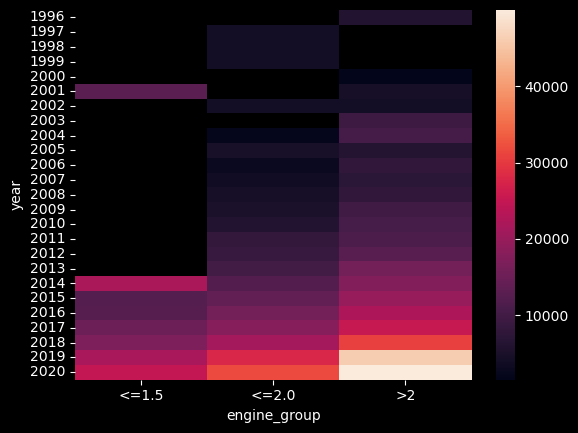

In [73]:
import seaborn as sns

sns.heatmap(t)

### на хитмапе видноо. чем ниже и правее, тем полоски светлее, значит больше цена


In [80]:
# теперь джойним модель к тесту и трайну и смотрим
# сначала переименую столбец
model_year_engine_median = model_year_engine_median.rename({'price': 'price_pred_year_engine_median'}, axis=1)
model_year_engine_median

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2.0,3950.0
2,1998,<=2.0,3950.0
3,1999,<=2.0,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2.0,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


In [82]:
# теперь джойню по двум ключам
train = train.merge(model_year_engine_median, how='left', on=['year', 'engine_group'])

In [83]:
mean_absolute_error(y_true=train['price'], y_pred=train['price_pred_year_engine_median'])

3659.774273345702

In [84]:
mean_absolute_percentage_error(y_true=train['price'], y_pred=train['price_pred_year_engine_median'])

0.1582922021242831

процент ошибок стал еще меньше. улучшение на 6 проценттных пунктов.

теперь смотрим на качество на тесте

что бы сделать предсказание на тесте. нужно что бы в тесте тоже была enginegroup

In [85]:
test['engine_group']= test['engineSize'].apply(engine_group)
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2.0
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0,31066.986143,27980.0,<=2.0
2692,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0,31066.986143,27980.0,>2
2693,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0,19205.839506,18299.5,<=2.0
2694,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0,31066.986143,27980.0,<=2.0


In [87]:
test = test.merge(model_year_engine_median, how='left', on=['year', 'engine_group'])

In [89]:
test.isna().mean() # смотрим пропуски. так как могут быть какие то года где не было каких то двиггателей

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_pred_year_median           0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.000742
dtype: float64

In [91]:
# тут всего два авто. посчиаем без них. 
test[test['price_pred_year_engine_median'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20022.0,3980.0,3995.0,>2,NaN
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,20022.0,1550.0,1550.0,<=2.0,NaN


In [92]:
# что бы каждый раз не вызывать те функции которые считают ошибки. можно написать для этого функцию обертку
def error(y_true, y_pred):
    print(mean_absolute_error(y_true=y_true, y_pred=y_pred))
    print(mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred))

In [95]:
error(y_true=train['price'], y_pred=train['price_pred_year_median'])

5232.327891156463
0.21723436816638503


In [94]:
error(y_true=test['price'], y_pred=test['price_pred_year_median'])

5240.677299703264
0.21478293590399475


In [96]:
error(y_true=train['price'], y_pred=train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [97]:
error(y_true=test['price'], y_pred=test['price_pred_year_engine_median']) 

ValueError: Input contains NaN.

###  из за пропусков не проходит. так что выкину пропуски пока что просто

In [99]:
test_no_nan = test.dropna().copy()

теперь на тесте ошибка немного больше чем на трейне. а произошло это потому что модель стала немного сложной уже
и она запомнила какие то особенности обучающей выборки. 

In [100]:
error(y_true=test_no_nan['price'], y_pred=test_no_nan['price_pred_year_engine_median']) 

3790.014291017075
0.16270961023342095


# upgrade model

### есть еще данные которые можно добавить в модель. есть пробег, коробка передач и  тд

In [101]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2.0,"(1.5, 2.0]",9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,"(2.0, inf]",18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2.0,"(1.5, 2.0]",27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0,<=2.0,"(1.5, 2.0]",20750.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5,>2,"(2.0, inf]",19996.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0,<=2.0,"(1.5, 2.0]",27294.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5,<=2.0,"(1.5, 2.0]",15500.0


In [102]:
train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2698,22413.452187,19392.0
Manual,1925,14557.851429,13450.0
Semi-Auto,3462,27377.835066,24990.0


если сейчас например добавить еще и коробку передач, то условий в модели умножаться на три.

так как три типа коробки передач

и будет еще больше пропусков в модели.

и здесь напрашивается очевидное решение. сгрупировать года

In [104]:

len(model_year_engine_median)

51

In [105]:
model_year_engine_median

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2.0,3950.0
2,1998,<=2.0,3950.0
3,1999,<=2.0,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2.0,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


In [109]:
# посмотреть и понять какие года можно сгруппировать. например все до 2010 в одну группу. и далее с шагом по 5 лет
train.groupby('year')['price'].agg(['count', 'median'])

,count,median
year,,
1996,1,5995.0
1997,1,3950.0
1998,1,3950.0
1999,3,3995.0
2000,1,1550.0
2001,3,5950.0
2002,4,3494.5
2003,2,9222.5
2004,7,3495.0


In [112]:
# когда группируешь с cut то верхняя граница включается
pd.cut(train['year'], [0, 2010, 2015, float('inf')])

0       (2010.0, 2015.0]
1          (2015.0, inf]
2       (2010.0, 2015.0]
3          (2015.0, inf]
4       (2010.0, 2015.0]
              ...       
8080       (2015.0, inf]
8081       (2015.0, inf]
8082       (2015.0, inf]
8083       (2015.0, inf]
8084       (2015.0, inf]
Name: year, Length: 8085, dtype: category
Categories (3, interval[float64, right]): [(0.0, 2010.0] < (2010.0, 2015.0] < (2015.0, inf]]

In [146]:
train['year_group'] = pd.cut(train['year'], [0, 2010, 2015, float('inf')])

In [147]:
train.groupby('year_group', observed=False)['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year_group,,,
"(0.0, 2010.0]",124,6264.258065,5584.0
"(2010.0, 2015.0]",1482,13455.487854,12499.5
"(2015.0, inf]",6479,25090.233369,22561.0


возможно разделил грубовато. и потеряю в качестве. сейчас оценю на train сначала. 

создам модель

In [148]:
model_year_engine_group_median = train.groupby(['year_group', 'engine_group'], observed=False)['price'].median().reset_index()

In [149]:
model_year_engine_group_median

,year_group,engine_group,price
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2.0,4097.0
2,"(0.0, 2010.0]",>2,6990.0
3,"(2010.0, 2015.0]",<=1.5,11000.0
4,"(2010.0, 2015.0]",<=2.0,11647.0
5,"(2010.0, 2015.0]",>2,16998.0
6,"(2015.0, inf]",<=1.5,16482.0
7,"(2015.0, inf]",<=2.0,22490.5
8,"(2015.0, inf]",>2,32888.0


переименовываю столбец, так как пандас к одинаковым столбцам подставит y и x. ичто бы потом не разбираться с этим
лучше переименовать сначала

In [150]:
model_year_engine_group_median = model_year_engine_group_median.rename({"price": "pred_price_year_engine_group_median"}, axis=1)

In [151]:
train = train.merge(model_year_engine_group_median, how='left', on=['year_group', 'engine_group'])

In [152]:
error(y_true=train['price'], y_pred=train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [153]:
error(y_true=train['price'], y_pred=train['pred_price_year_engine_group_median'])

6252.865800865801
0.28334701210863145


результаты стали хуже. попробую расширить группы

In [155]:
train['year_group'] = pd.cut(train['year'], [0, 2010, 2012, 2014, 2016, 2018, float('inf')])
train.groupby('year_group', observed=False)['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year_group,,,
"(0.0, 2010.0]",124,6264.258065,5584.0
"(2010.0, 2012.0]",129,9268.682171,8985.0
"(2012.0, 2014.0]",637,12470.036107,11695.0
"(2014.0, 2016.0]",2114,16042.201514,15080.5
"(2016.0, 2018.0]",1931,20309.644744,19370.0
"(2018.0, inf]",3150,31819.188571,28867.5


In [156]:
model_year_engine_group_median = train.groupby(['year_group', 'engine_group'], observed=False)['price'].median().reset_index()

In [157]:
model_year_engine_group_median = model_year_engine_group_median.rename({"price": "pred_price_year_engine_group_median"}, axis=1)

In [170]:
model_year_engine_group_median

,year_group,engine_group,pred_price_year_engine_group_median
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2.0,4097.0
2,"(0.0, 2010.0]",>2,6990.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2.0,8470.0
5,"(2010.0, 2012.0]",>2,12245.0
6,"(2012.0, 2014.0]",<=1.5,14972.5
7,"(2012.0, 2014.0]",<=2.0,10998.0
8,"(2012.0, 2014.0]",>2,16345.0
9,"(2014.0, 2016.0]",<=1.5,11557.0


In [168]:
train = train.drop(['pred_price_year_engine_group_median_y', 'pred_price_year_engine_group_median_x'],axis=1)

In [171]:
train = train.merge(model_year_engine_group_median, how='left', on=['year_group', 'engine_group'])

In [173]:
# из за всех мерджей добавился y. поэтому написал drop чуть выше.
error(y_true=train['price'], y_pred=train['pred_price_year_engine_group_median'])

3827.4336425479282
0.1693848259731495


# теперь добавлю коробку передач

In [178]:
# нужно просто расширить таблицу. в группировку докинуть еще transmition
model_year_engine_trn_group_median = (train.groupby(['year_group', 
                                                     'engine_group', 
                                                     'transmission'], 
                                                observed=False)['price']
                                                .median().reset_index())

In [179]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2.0,Automatic,5982.5
4,"(0.0, 2010.0]",<=2.0,Manual,3995.0
5,"(0.0, 2010.0]",<=2.0,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


в таблице выше много где есть NaN. это потому что пандас рисует все что есть в переменных в выборке.

например в таблице есть (0.0, 2010.0]	<=1.5	Automatic	NaN

но машини такой там просто нет в датафрейме. Но он все равно рисует всё.

можно сделать для того что бы посмотреть и убедиться без интервальной переменной.(ниже)

In [184]:
 # просто посомтреть. будет ли NaN.
# как сделать что бы пандас сразу все строки показал? надо в настройках пандас это указать
pd.options.display.max_rows=99


(train.groupby(['year', 
             'engine_group', 
             'transmission'], 
        observed=False)['price']
        .median().reset_index())

,year,engine_group,transmission,price
0,1996,>2,Automatic,5995.0
1,1997,<=2.0,Manual,3950.0
2,1998,<=2.0,Manual,3950.0
3,1999,<=2.0,Manual,3995.0
4,2000,>2,Automatic,1550.0
...,...,...,...,...
107,2020,<=2.0,Automatic,34550.0
108,2020,<=2.0,Manual,24240.0
109,2020,<=2.0,Semi-Auto,31233.0
110,2020,>2,Automatic,44899.0


In [185]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2.0,Automatic,5982.5
4,"(0.0, 2010.0]",<=2.0,Manual,3995.0
5,"(0.0, 2010.0]",<=2.0,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


In [187]:
model_year_engine_trn_group_median = model_year_engine_trn_group_median.rename({"price": "price_pred_year_engine_trn_median"}, axis=1)

In [194]:
# уже соединяю по трем ключам
train = train.merge(model_year_engine_trn_group_median, how='left', on=['year_group', 'engine_group', 'transmission'])

In [191]:
error(y_true=train['price'], y_pred=train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [195]:
error(y_true=train['price'], y_pred=train['price_pred_year_engine_trn_median'])

3635.5412492269634
0.1561691679065392


улучшились совсем немного на трейне. надо проверить на тесте

In [196]:
# этого не хватало на тесте
test['year_group'] = pd.cut(test['year'], [0, 2010, 2012, 2014, 2016, 2018, float('inf')])


In [198]:
test = test.merge(model_year_engine_trn_group_median, how='left', 
               on=['year_group', 'engine_group', 'transmission'])

In [202]:
# пропускии есть. пока дропнем. но можно как то придумывать что туда ставить. 
test.isna().mean() 

model                                0.000000
year                                 0.000000
price                                0.000000
transmission                         0.000000
mileage                              0.000000
fuelType                             0.000000
tax                                  0.000000
mpg                                  0.000000
engineSize                           0.000000
price_pred_median                    0.000000
price_pred_year_mean                 0.000000
price_pred_year_median               0.000000
engine_group                         0.000000
price_pred_year_engine_median        0.000742
year_group                           0.000000
price_pred_year_engine_trn_median    0.001113
dtype: float64

In [203]:
test_no_na = test.dropna().copy()

In [204]:
error(y_true=test_no_na['price'], y_pred=test_no_na['price_pred_year_engine_trn_median'])

3777.5172798216277
0.16037327734163415


это были принципы человеческого обучения. создание ручных моделей. rollbase модели. которые на простых правилах

посмотрел на данные и выработал правила.

какие дальнейшие шаги?

возможно добавить еще переменных, возможно по другому сгрупировтаь, возможно убрать вообще из выборки какието старые года.

но у человеческого обучения есть границы.
такой подход интересный. но он не особо масштабируется.

И так.
делю данные на две выборки. обучаюсь на трайн выборки, провверяю на тестовой